In [51]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import random

sns.set(rc={'figure.figsize':(25,8)})

In [2]:
df = pd.read_csv("./contact-me data for assignment 2.0.csv")

In [3]:
#создадим копию, для возможности обработки пустых значений
df_copy = df.copy()


In [4]:
"""ПРЕОБРАЗОВАНИЕ ФОРМАТОВ ДАННЫХ"""
#преобразуем в формат строк
str_type_columns = df.loc[:,~df.columns.isin(["dateTime"])].columns.to_list()

df[str_type_columns] = df.loc[:,df.columns.isin(str_type_columns)].astype(str)
#преобразуем в формат даты
df['dateTime'] = pd.to_datetime(df.dateTime, infer_datetime_format=True)

In [5]:
"""ИССЛЕДОВАНИЕ И ФИЛЬТРАЦИЯ ДАННЫХ"""
#определяем нужные нам типы событий и фильтруем
events_type_to_test = ["landing.unique-visit","register-confirm-code-success","editor.add.click","editor-link.copy.click","payment.attempt","payment.success"]
df = df.loc[df.event.isin(events_type_to_test)]

In [6]:
"""
ОПИСАНИЕ КОЛОНОК
localUserId — идентификатор пользователя
dateTime — дата события 
utm_campaign — название кампании 
utm_source — источник трафика 
utm_medium — название типа кампании 
os — операционная система пользователя 
browser — браузер пользователя 
blockid — идентификатор блока, с которым произошло событие
event — произошедшее событие """

'\nОПИСАНИЕ КОЛОНОК\nlocalUserId — идентификатор пользователя\ndateTime — дата события \nutm_campaign — название кампании \nutm_source — источник трафика \nutm_medium — название типа кампании \nos — операционная система пользователя \nbrowser — браузер пользователя \nblockid — идентификатор блока, с которым произошло событие\nevent — произошедшее событие '

In [7]:
#отметим что временной промежуток данных 28 дней
df.sort_values("dateTime", ascending=False)


,localUserId,dateTime,utm_campaign,utm_source,utm_medium,os,browser,blockid,event
39724,56560134-fae9-4f4d-846e-f608059416ef,2022-02-28 23:57:32.805000+00:00,nan,nan,nan,Android,Instagram,nan,landing.unique-visit
40307,fa2f7329-1e66-459e-9c9c-63829ddc8876,2022-02-28 23:56:41.005000+00:00,nan,nan,nan,Android,Chrome,nan,landing.unique-visit
39874,4b051bb8-2812-4b31-8c98-6a5d0b6a1917,2022-02-28 23:28:58.672000+00:00,nan,nan,nan,Windows,Chrome,nan,landing.unique-visit
40451,9eb7a250-83b8-4593-ace6-2f5117a70588,2022-02-28 23:28:17.525000+00:00,cid|13824308637|0721|google|cpc|by|teplye_2|sa...,google,cpc,Android,Chrome,nan,landing.unique-visit
41183,f14db8d4-471c-4038-ad24-f372a502e8b4,2022-02-28 23:27:21.229000+00:00,nan,nan,nan,iOS,Mobile Safari,nan,register-confirm-code-success
...,...,...,...,...,...,...,...,...,...
46658,583eca5b-90ca-45da-8b5e-ee65dbde87f3,2022-02-01 00:12:57.694000+00:00,nan,visitka,nan,Android,Chrome,nan,editor-link.copy.click
46657,583eca5b-90ca-45da-8b5e-ee65dbde87f3,2022-02-01 00:10:39.714000+00:00,nan,visitka,nan,Android,Chrome,nan,editor.add.click
46555,8dc3cf85-c2a1-4ca4-8c69-f519594e28a1,2022-02-01 00:05:57.744000+00:00,cid|13813036738|0521|google|cpc|by|competitors...,google,cpc,Android,Chrome,nan,editor.add.click
46744,4a60cb07-e715-46a4-9d41-306d545348d3,2022-02-01 00:05:50.760000+00:00,nan,nan,nan,iOS,Mobile Safari,nan,landing.unique-visit


In [8]:
#добавим колонку с датами
df["date"] = df.dateTime.dt.date

In [9]:
# переименуем события в новой колонке для более комфортного восприятия
rename_dict = {
    'landing.unique-visit': 'Переход на лэдинг',
    'register-confirm-code-success': 'Регистрация',
    'editor.add.click': 'Клик по Добавить',
    'editor-link.copy.click': "Клик по копировать ссылку",
    'payment.attempt': "Нажал оплатить",
    'payment.success' : "Успешная оплата"
}

def rename_event (event):
  if event in rename_dict:
    return rename_dict[event]

df["rename_event"] = df.event.map(rename_event)

In [10]:
df

,localUserId,dateTime,utm_campaign,utm_source,utm_medium,os,browser,blockid,event,date,rename_event
0,1a8f3eb1-414b-45e8-8ccb-79043494ef68,2022-02-27 23:28:23.673000+00:00,nan,visitka,nan,Android,Instagram,nan,register-confirm-code-success,2022-02-27,Регистрация
1,1a8f3eb1-414b-45e8-8ccb-79043494ef68,2022-02-27 23:29:10.436000+00:00,nan,visitka,nan,Android,Instagram,nan,editor.add.click,2022-02-27,Клик по Добавить
3,1a8f3eb1-414b-45e8-8ccb-79043494ef68,2022-02-27 23:31:29.211000+00:00,nan,visitka,nan,Android,Instagram,nan,editor.add.click,2022-02-27,Клик по Добавить
6,1a8f3eb1-414b-45e8-8ccb-79043494ef68,2022-02-27 23:32:58.856000+00:00,nan,visitka,nan,Android,Instagram,nan,editor.add.click,2022-02-27,Клик по Добавить
8,1a8f3eb1-414b-45e8-8ccb-79043494ef68,2022-02-27 23:34:20.776000+00:00,nan,visitka,nan,Android,Instagram,nan,editor-link.copy.click,2022-02-27,Клик по копировать ссылку
...,...,...,...,...,...,...,...,...,...,...,...
63227,ea8e593a-feaf-4fcf-9d10-1c2136ef3433,2022-02-19 18:34:11.768000+00:00,nan,visitka,nan,iOS,Instagram,nan,editor.add.click,2022-02-19,Клик по Добавить
63231,ea8e593a-feaf-4fcf-9d10-1c2136ef3433,2022-02-19 18:45:05.714000+00:00,nan,visitka,nan,iOS,Instagram,nan,editor.add.click,2022-02-19,Клик по Добавить
63233,ea8e593a-feaf-4fcf-9d10-1c2136ef3433,2022-02-19 18:51:05.199000+00:00,nan,visitka,nan,iOS,Instagram,nan,editor.add.click,2022-02-19,Клик по Добавить
63235,ea8e593a-feaf-4fcf-9d10-1c2136ef3433,2022-02-19 18:52:26.823000+00:00,nan,visitka,nan,iOS,Instagram,nan,editor.add.click,2022-02-19,Клик по Добавить


In [11]:
# кол-во уникальных пользователей
df.localUserId.nunique()

9292

In [12]:
# количество действий на каждого пользователя, есть подозрительно активные
df.localUserId.value_counts()

3f2fa233-444b-4e87-a5c4-0277499c4be4    806
d55d8041-3352-4137-86ac-746b9a2cdade    244
b131e91c-2ce8-4581-aeff-d29293ebbea5    108
d2eecbce-05c3-4496-a1ec-1fc2dd6896e6    100
ba3c53f8-854b-472e-b44c-de81b581bdbd     86
                                       ... 
d4d4cda9-6535-4659-9990-87b2db47c70d      1
742d9f82-585d-4742-a7b8-2d16347007b5      1
b6fc06ed-494e-4a78-bd67-efab41dac4d5      1
7df9dec1-1691-4e33-8318-b2b195dfef8a      1
91c4c487-d2a3-43c0-8af8-f94125e31169      1
Name: localUserId, Length: 9292, dtype: int64

In [13]:
# рассмотрим самого активного пользователя 
df_top_user = df.loc[df.localUserId == "3f2fa233-444b-4e87-a5c4-0277499c4be4"]

df_top_user

,localUserId,dateTime,utm_campaign,utm_source,utm_medium,os,browser,blockid,event,date,rename_event
145,3f2fa233-444b-4e87-a5c4-0277499c4be4,2022-02-27 23:01:02.049000+00:00,nan,nan,nan,nan,AdsBot-Google,nan,landing.unique-visit,2022-02-27,Переход на лэдинг
1527,3f2fa233-444b-4e87-a5c4-0277499c4be4,2022-02-27 03:00:00.102000+00:00,nan,nan,nan,Android,Googlebot,nan,landing.unique-visit,2022-02-27,Переход на лэдинг
1578,3f2fa233-444b-4e87-a5c4-0277499c4be4,2022-02-27 23:35:14.049000+00:00,cid|13824314847|0721|google|cpc|ru|teplye_2|sa...,google,cpc,Mac OS,AdsBot-Google,nan,landing.unique-visit,2022-02-27,Переход на лэдинг
1579,3f2fa233-444b-4e87-a5c4-0277499c4be4,2022-02-27 00:22:49.049000+00:00,cid|13245125206|0521|google|cpc|ru|competitors...,google,cpc,Mac OS,AdsBot-Google,nan,landing.unique-visit,2022-02-27,Переход на лэдинг
1580,3f2fa233-444b-4e87-a5c4-0277499c4be4,2022-02-27 00:25:07.049000+00:00,cid|13824308637|0721|google|cpc|by|teplye_2|sa...,google,cpc,Mac OS,AdsBot-Google,nan,landing.unique-visit,2022-02-27,Переход на лэдинг
...,...,...,...,...,...,...,...,...,...,...,...
63193,3f2fa233-444b-4e87-a5c4-0277499c4be4,2022-02-19 10:33:38.050000+00:00,16252098687,google,cpc,iOS,Mobile Safari,nan,landing.unique-visit,2022-02-19,Переход на лэдинг
63194,3f2fa233-444b-4e87-a5c4-0277499c4be4,2022-02-19 23:36:45.049000+00:00,cid|13811038492|0521|google|cpc|kz|competitors...,google,cpc,iOS,Mobile Safari,nan,landing.unique-visit,2022-02-19,Переход на лэдинг
63195,3f2fa233-444b-4e87-a5c4-0277499c4be4,2022-02-19 16:05:20.074000+00:00,cid|13824314847|0721|google|cpc|ru|teplye_2|so...,google,cpc,iOS,Mobile Safari,nan,landing.unique-visit,2022-02-19,Переход на лэдинг
63196,3f2fa233-444b-4e87-a5c4-0277499c4be4,2022-02-19 15:45:18.059000+00:00,16252098687,google,cpc,iOS,Mobile Safari,nan,landing.unique-visit,2022-02-19,Переход на лэдинг


In [14]:
# все его действия - это переход на лэндинг, выполненные с различных устройств, вероятнее всего это тестировщик ПО, можно исключить из анализа
df_top_user.rename_event.value_counts()

Переход на лэдинг    806
Name: rename_event, dtype: int64

In [15]:
df = df.loc[df.localUserId != "3f2fa233-444b-4e87-a5c4-0277499c4be4"]

In [16]:
# рассмотрим топ 2-5 самых активных пользователей 
df_top_user = df.loc[df.localUserId == "d55d8041-3352-4137-86ac-746b9a2cdade"]

df_top_user.rename_event.value_counts()

Клик по Добавить             215
Клик по копировать ссылку     21
Регистрация                    7
Переход на лэдинг              1
Name: rename_event, dtype: int64

In [17]:

df_top_user = df.loc[df.localUserId == "b131e91c-2ce8-4581-aeff-d29293ebbea5"]

df_top_user.rename_event.value_counts()

Клик по Добавить             93
Клик по копировать ссылку    11
Регистрация                   3
Нажал оплатить                1
Name: rename_event, dtype: int64

In [18]:

df_top_user = df.loc[df.localUserId == "d2eecbce-05c3-4496-a1ec-1fc2dd6896e6"]

df_top_user.rename_event.value_counts()

Клик по Добавить             97
Клик по копировать ссылку     2
Переход на лэдинг             1
Name: rename_event, dtype: int64

In [19]:

df_top_user = df.loc[df.localUserId == "ba3c53f8-854b-472e-b44c-de81b581bdbd"]

df_top_user.rename_event.value_counts()
# трудно сказать, зачем топ 2-5 активных юзеров жали на кнопку "добавить" так активно, вероятно изучали контент, но удалить их из статистики нельзя 

Клик по Добавить             71
Клик по копировать ссылку    14
Регистрация                   1
Name: rename_event, dtype: int64

In [20]:
# рассмотрим строки с пустыми значениями операционной системы - они все соответствуют пользователям, которые единожды зашли на лэндинг 
# и больше не совершали никаких действий - "мертвые" клиенты, можно удалять
df.loc[df.os == "nan"]

,localUserId,dateTime,utm_campaign,utm_source,utm_medium,os,browser,blockid,event,date,rename_event
146,0a49e7b0-f46c-4c1d-9b87-114a67d2c980,2022-02-27 22:27:31.789000+00:00,nan,nan,nan,nan,YandexBot,nan,landing.unique-visit,2022-02-27,Переход на лэдинг
147,4ef0cd5b-49fb-4a48-93b0-f7bb79cf6b89,2022-02-27 23:26:41.155000+00:00,nan,nan,nan,nan,YandexBot,nan,landing.unique-visit,2022-02-27,Переход на лэдинг
2770,42a3c992-903d-45b2-814c-522a92b8bed0,2022-02-07 08:40:20.811000+00:00,nan,nan,nan,nan,nan,nan,landing.unique-visit,2022-02-07,Переход на лэдинг
6962,cf5a7160-b6ff-4798-ae7d-914e08ae1327,2022-02-20 06:48:31.232000+00:00,nan,nan,nan,nan,nan,nan,landing.unique-visit,2022-02-20,Переход на лэдинг
6965,53a55116-32a1-4d26-9dd8-e592152fc0ae,2022-02-20 03:00:00.136000+00:00,nan,nan,nan,nan,Chrome,nan,landing.unique-visit,2022-02-20,Переход на лэдинг
9546,892b86dd-d96d-4f4f-9c1f-1b9e55002a2d,2022-02-02 09:54:11.536000+00:00,nan,nan,nan,nan,nan,nan,landing.unique-visit,2022-02-02,Переход на лэдинг
10642,f32a8972-21f5-41dd-95c7-78d93a99cfd8,2022-02-23 23:00:21.568000+00:00,nan,nan,nan,nan,YandexBot,nan,landing.unique-visit,2022-02-23,Переход на лэдинг
12379,bd501eb7-08e3-4acf-9ec8-cdb9f3284c89,2022-02-15 09:52:27.755000+00:00,nan,nan,nan,nan,nan,nan,landing.unique-visit,2022-02-15,Переход на лэдинг
14576,26655377-0fa5-40dd-aa97-4df011355ee9,2022-02-22 01:23:12.954000+00:00,nan,nan,nan,nan,nan,nan,landing.unique-visit,2022-02-22,Переход на лэдинг
33080,dd9abef8-942f-4e4e-a25d-2d0528fa875f,2022-02-21 09:52:11.533000+00:00,nan,nan,nan,nan,nan,nan,landing.unique-visit,2022-02-21,Переход на лэдинг


In [21]:
# рассмотрим пользователей с пустым браузером - у них пустые все колонки с вводимыми параметрами и один тип действия "переход на лэндинг", 
# можно считать их ошибкой считывания и удалить из статистики. 
df.loc[df.browser == "nan"]

,localUserId,dateTime,utm_campaign,utm_source,utm_medium,os,browser,blockid,event,date,rename_event
2770,42a3c992-903d-45b2-814c-522a92b8bed0,2022-02-07 08:40:20.811000+00:00,nan,nan,nan,nan,nan,nan,landing.unique-visit,2022-02-07,Переход на лэдинг
6962,cf5a7160-b6ff-4798-ae7d-914e08ae1327,2022-02-20 06:48:31.232000+00:00,nan,nan,nan,nan,nan,nan,landing.unique-visit,2022-02-20,Переход на лэдинг
9546,892b86dd-d96d-4f4f-9c1f-1b9e55002a2d,2022-02-02 09:54:11.536000+00:00,nan,nan,nan,nan,nan,nan,landing.unique-visit,2022-02-02,Переход на лэдинг
12379,bd501eb7-08e3-4acf-9ec8-cdb9f3284c89,2022-02-15 09:52:27.755000+00:00,nan,nan,nan,nan,nan,nan,landing.unique-visit,2022-02-15,Переход на лэдинг
14576,26655377-0fa5-40dd-aa97-4df011355ee9,2022-02-22 01:23:12.954000+00:00,nan,nan,nan,nan,nan,nan,landing.unique-visit,2022-02-22,Переход на лэдинг
33080,dd9abef8-942f-4e4e-a25d-2d0528fa875f,2022-02-21 09:52:11.533000+00:00,nan,nan,nan,nan,nan,nan,landing.unique-visit,2022-02-21,Переход на лэдинг
33081,97b9eb01-c309-44f6-ad33-8cc82a856426,2022-02-21 17:43:09.110000+00:00,nan,nan,nan,nan,nan,nan,landing.unique-visit,2022-02-21,Переход на лэдинг
33082,034301c6-47b8-444f-8a88-20d432765c19,2022-02-21 15:47:38.028000+00:00,nan,nan,nan,nan,nan,nan,landing.unique-visit,2022-02-21,Переход на лэдинг
33083,d2b3feae-3b46-44df-a4c8-b189ed2426b2,2022-02-21 20:04:01.555000+00:00,nan,nan,nan,nan,nan,nan,landing.unique-visit,2022-02-21,Переход на лэдинг
33084,8b039da0-085f-47a9-b025-7062b44d5f89,2022-02-21 22:08:45.433000+00:00,nan,nan,nan,nan,nan,nan,landing.unique-visit,2022-02-21,Переход на лэдинг


In [22]:
df = df.loc[df.os != "nan"]
df = df.loc[df.browser != "nan"]

In [23]:
# половина записей без указания данных о компании и типе трафика , идентификатор блока события почти везде пустой - можно удалить колонки

df_copy.loc[df_copy.event.isin(events_type_to_test)].isnull().sum()

localUserId         0
dateTime            0
utm_campaign    15433
utm_source       8597
utm_medium      15427
os                 71
browser            47
blockid         30209
event               0
dtype: int64

<AxesSubplot:xlabel='Count', ylabel='event'>

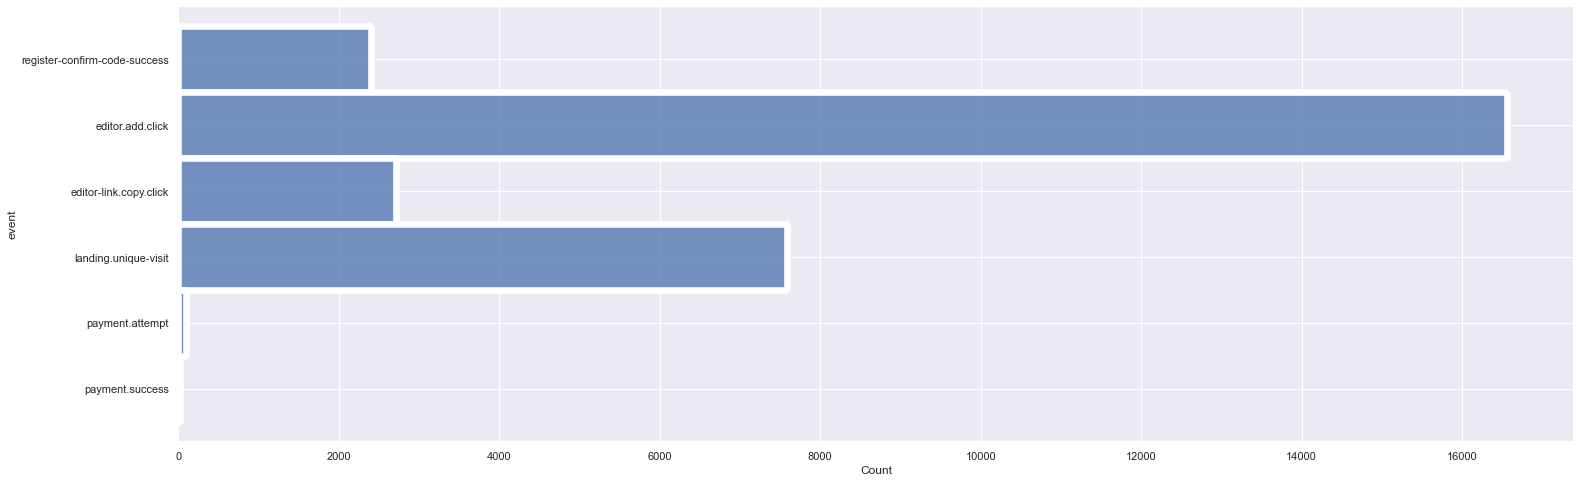

In [24]:
sns.histplot(data = df, y='event',  kde=False)
# половина всех событий - это клик по кнопке "добавить", четверть - посещение страницы лэндинга, восьмые части составляют регистрация и копирование ссылки
# очевидно для корректной статистики и расчета конверсии необходимо учитывать уникальные для каждого пользователя действия 

<AxesSubplot:xlabel='os', ylabel='Count'>

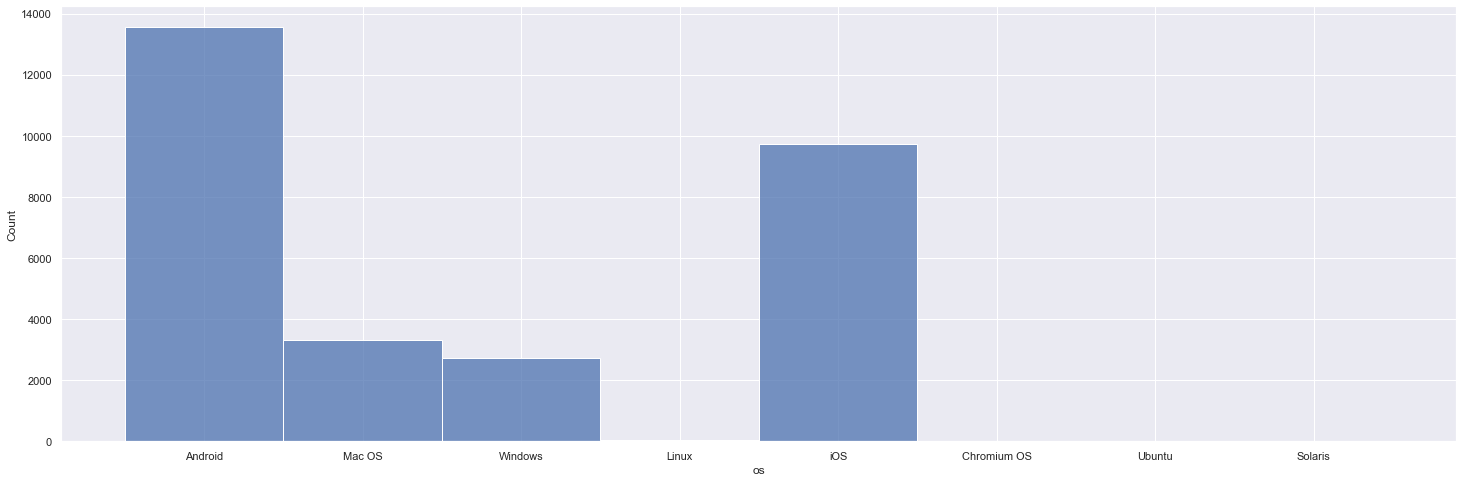

In [25]:

# оценим общее распр
# операционки используемые чаще всего: android, ios, mac os, windows - остальные незначительны.
sns.histplot(data = df, x='os',  kde=False)

<AxesSubplot:xlabel='Count', ylabel='browser'>

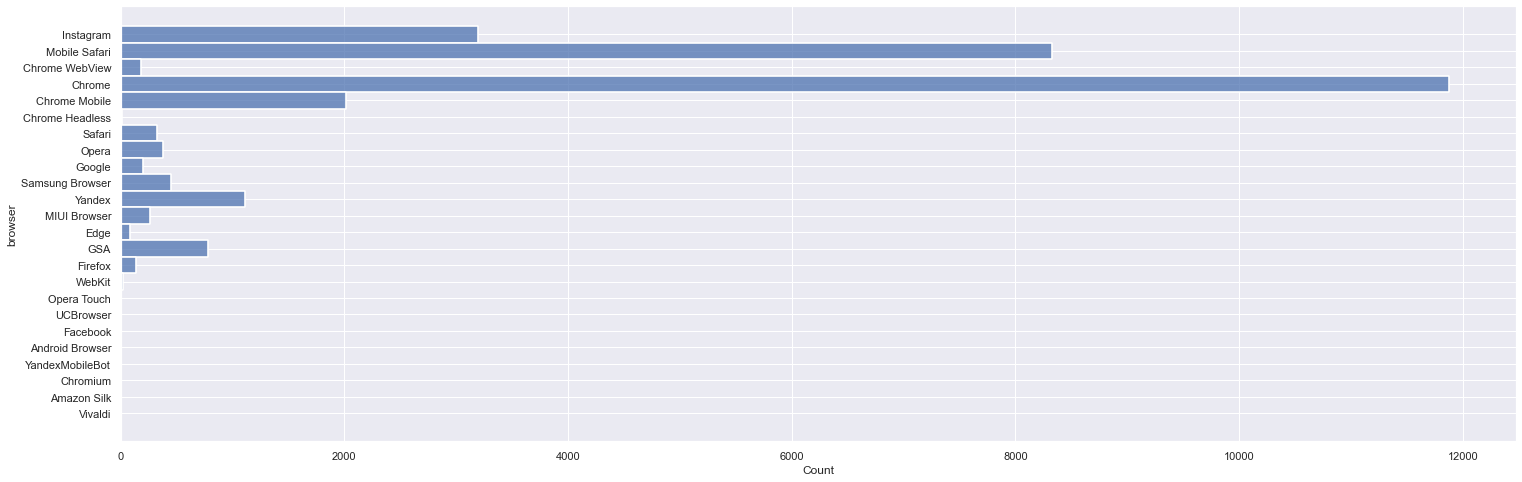

In [26]:
sns.histplot(data = df, y='browser',  kde=False)
# наиболее распространенные брузеры: chrome, mobile safari, instagramm, chrome mobile, yandex, gsa, samsung, opera, miui, safari


In [27]:
# оставим только нужные колонки
df = df.loc[:,["localUserId","utm_source","os","browser","rename_event","date"]]
df

,localUserId,utm_source,os,browser,rename_event,date
0,1a8f3eb1-414b-45e8-8ccb-79043494ef68,visitka,Android,Instagram,Регистрация,2022-02-27
1,1a8f3eb1-414b-45e8-8ccb-79043494ef68,visitka,Android,Instagram,Клик по Добавить,2022-02-27
3,1a8f3eb1-414b-45e8-8ccb-79043494ef68,visitka,Android,Instagram,Клик по Добавить,2022-02-27
6,1a8f3eb1-414b-45e8-8ccb-79043494ef68,visitka,Android,Instagram,Клик по Добавить,2022-02-27
8,1a8f3eb1-414b-45e8-8ccb-79043494ef68,visitka,Android,Instagram,Клик по копировать ссылку,2022-02-27
...,...,...,...,...,...,...
63227,ea8e593a-feaf-4fcf-9d10-1c2136ef3433,visitka,iOS,Instagram,Клик по Добавить,2022-02-19
63231,ea8e593a-feaf-4fcf-9d10-1c2136ef3433,visitka,iOS,Instagram,Клик по Добавить,2022-02-19
63233,ea8e593a-feaf-4fcf-9d10-1c2136ef3433,visitka,iOS,Instagram,Клик по Добавить,2022-02-19
63235,ea8e593a-feaf-4fcf-9d10-1c2136ef3433,visitka,iOS,Instagram,Клик по Добавить,2022-02-19


In [28]:
# уберем дубликаты однотипных действий для каждого пользователя
df_unique = df.drop_duplicates(subset=['localUserId',"rename_event"])


In [29]:
# все в порядке - уникальность соблюдена...
df_unique.localUserId.value_counts()

063bdc5d-ac32-4674-aad3-324bb4f20490    6
f0b62952-a5dd-45a6-a6c1-48621f338590    6
06668ef7-b744-4349-86dd-c886e52238f0    6
7462c49f-a695-4263-a3d9-7dac4fb85c61    6
656b10b2-3296-4e1f-bb06-fcb4184bdd8d    6
                                       ..
52a99900-c0c9-4d90-bdc3-c15589c85bb9    1
118b389f-9f46-403c-a558-f060536a0e5f    1
920d7f6e-c069-4f7a-8296-5f2252b2a969    1
b949d6f5-42af-4b9f-a0ab-f6430b13ff84    1
5e51b921-1d1c-4dfe-8052-907ea2a52205    1
Name: localUserId, Length: 9270, dtype: int64

In [30]:
# как видно, источник трафика все еще не указан почти в 40% случаев, мы могли бы искуственно заполнить пустые значения, опираясь на распределение остальных, 
# а также увеличить качество сбора информации (для большей точности) - и в дальнейшем анализировать, какой источник дал нам больше активных лидов!
df_unique.utm_source.value_counts()

google          6142
nan             4834
visitka         2274
wazzup           611
404              148
yandex            74
vkontakte         39
instagram          4
google_poisk       4
waba               3
facebook           2
yandex_poisk       1
vk                 1
Name: utm_source, dtype: int64

Text(0.5, 1.0, 'visitka')

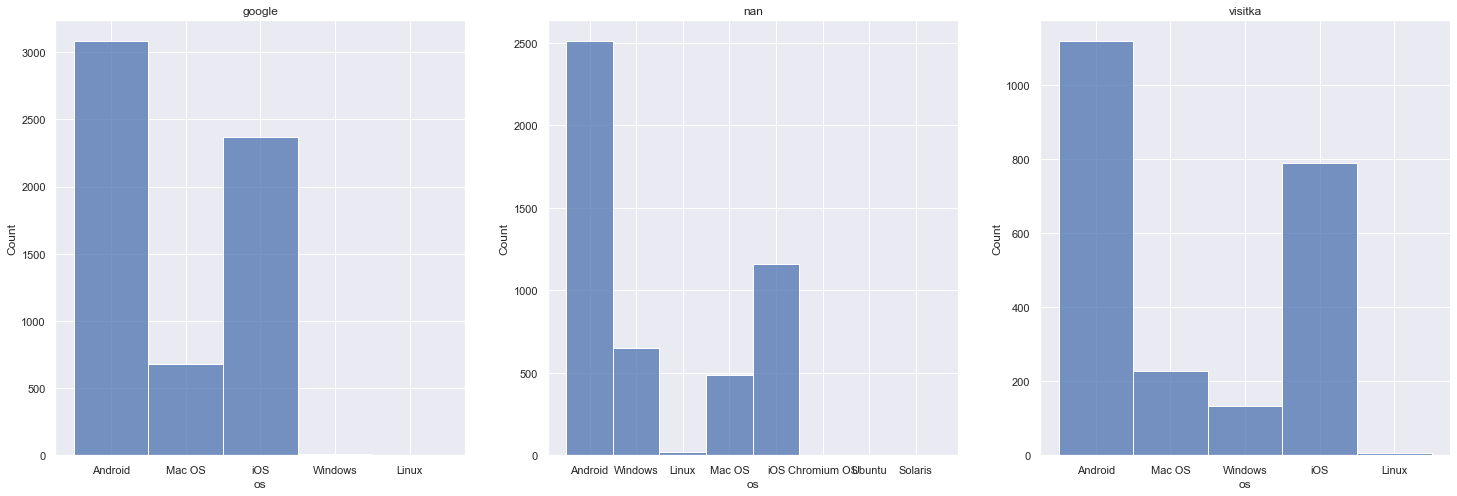

In [31]:
# сравним распределения по операционным системам для топ-3 (включая пустые) источников трафика, они похожи - сохраняются лидеры и пропорции, 
# заполним пустые поля , опираясь на вероятность распределения остальных данных.
# В случае выполнения реального задания, можно будет использовать ML...
fig, axs = plt.subplots(1,3)
sns.histplot(df_unique.loc[df_unique.utm_source == "google"], x="os", ax=axs[0]).set_title('google')
sns.histplot(df_unique.loc[df_unique.utm_source == "nan"], x="os", ax=axs[1]).set_title('nan')
sns.histplot(df_unique.loc[df_unique.utm_source == "visitka"], x="os", ax=axs[2]).set_title('visitka')

In [55]:
df_full = df_unique.loc[df_unique.utm_source != 'nan']
df_nan = df_unique.loc[df_unique.utm_source == 'nan']
df_full.groupby('utm_source').size() / len(df_full)

utm_source
404             0.015909
facebook        0.000215
google          0.660217
google_poisk    0.000430
instagram       0.000430
visitka         0.244437
vk              0.000107
vkontakte       0.004192
waba            0.000322
wazzup          0.065678
yandex          0.007954
yandex_poisk    0.000107
dtype: float64

In [57]:
def add_data(x):
  if random.random()<= 0.66:
    return "google"
  elif random.random() > 0.66 and random.random()<= 0.9:
    return "visitka"
  else:
    return "wazzup"

df_nan["utm_source"] = df_nan.utm_source.map(add_data)   

C:\Users\Espad\AppData\Local\Temp\ipykernel_12020\3104561056.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nan["utm_source"] = df_nan.utm_source.map(add_data)


In [60]:
df_unique = df_full.append(df_nan)

In [66]:
df_unique.utm_source.value_counts()

google          9363
visitka         2766
wazzup          1732
404              148
yandex            74
vkontakte         39
instagram          4
google_poisk       4
waba               3
facebook           2
yandex_poisk       1
vk                 1
Name: utm_source, dtype: int64

<AxesSubplot:xlabel='Count', ylabel='rename_event'>

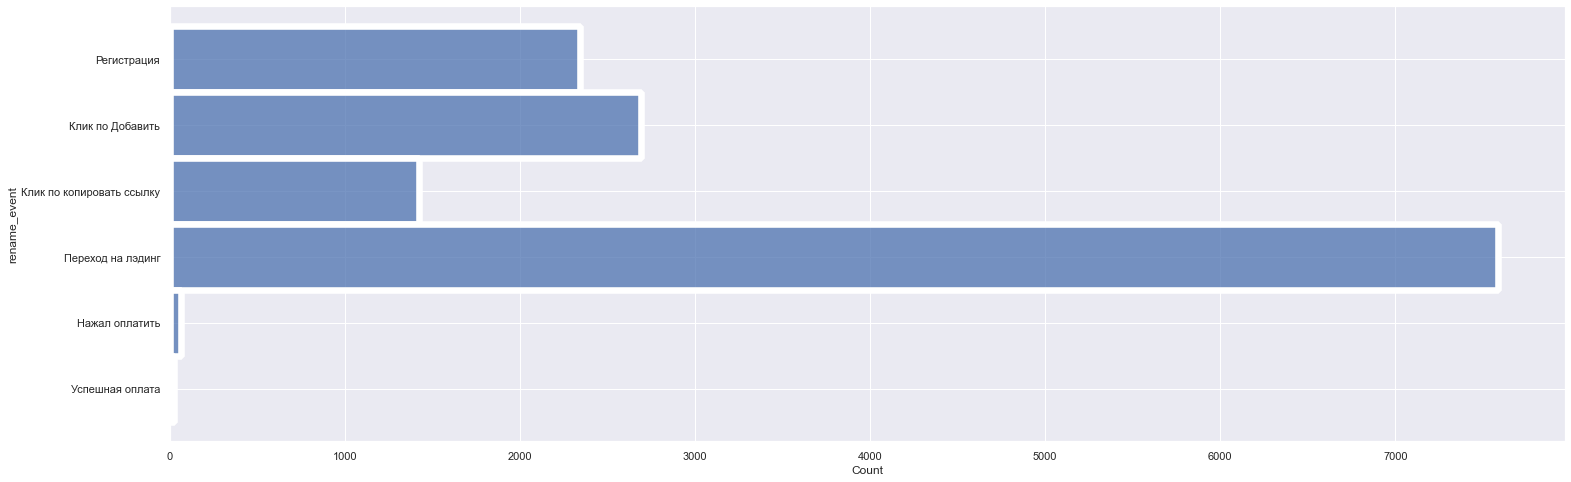

In [62]:
# проверим этапы общей воронки продаж на логичность - получили стандартную неотсортированную воронку по всем данным
sns.histplot(data = df_unique, y='rename_event',  kde=False)


In [64]:
df_unique.to_csv("./wazzup_test_df.csv")

In [ ]:
"""ЗАКЛЮЧЕНИЕ
Стоит отметить, что порядок этапов воронки заданный продактом неверный - кликов по "добавлению нового блока" значительно больше чем количество зарегистрированных пользователей!
Что вероятно говорит о том, что на сайте существует возможность добавлять новые блоки без регистрации в системе, а потому этап "добавлению нового блока" стоит сделать вторым. 
Если нам нужно отслеживать конверсию именно в заданном порядке, то необходимо ввести принудительную регистрацию на сайте до доступа к функционалу, но это очевидно скажется
на размере внутриэтапной конверсии!
Для того чтобы дашборд стал более наглядным и полезным - необходимо добавить: 
  -распределение лидов на каждом этапе по дням;
  -распределение конверсии по дням;
  -распределение по OS, браузерам и источникам трафика входящих пользователей;
  -вывести информацию о динамике продаж по месяцам (для большего количества данных).
"""

'ЗАКЛЮЧЕНИЕ\nСтоит отметить, что порядок этапов воронки заданный продактом неверный - кликов по "добавлению нового блока" значительно больше чем количество зарегистрированных пользователей!\nЧто вероятно говорит о том, что на сайте существует возможность добавлять новые блоки без регистрации в системе, а потому этап "добавлению нового блока" стоит сделать вторым. \nЕсли нам нужно отслеживать конверсию именно в заданном порядке, то необходимо ввести принудительную регистрацию на сайте до доступа к функционалу, но это очевидно скажется\nна размере внутриэтапной конверсии!\nДля того чтобы дашборд стал более наглядным и полезным - необходимо добавить: \n  -распределение лидов на каждом этапе по дням;\n  -распределение конверсии по дням;\n  -распределение по OS, браузерам и источникам трафика входящих пользователей;\n  -вывести информацию о динамике продаж по месяцам (для большего количества данных).\n'